In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 18ms/step - loss: 0.5612 - acc: 0.7574 - val_loss: 0.4407 - val_acc: 0.8570
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3557 - acc: 0.8945 - val_loss: 0.3352 - val_acc: 0.8849
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.2573 - acc: 0.9237 - val_loss: 0.3124 - val_acc: 0.8765
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2022 - acc: 0.9373 - val_loss: 0.2793 - val_acc: 0.8900
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1640 - acc: 0.9500 - val_loss: 0.2782 - val_acc: 0.8882
Epoch 6/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1357 - acc: 0.9596 - val_loss: 0.2844 - val_acc: 0.8858
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.1123 - acc: 0.9692 - val_loss: 0.3149 - val_acc: 0.8784
Epoch 8/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0942 - acc: 0.9

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

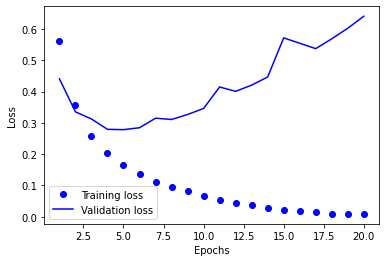

In [17]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
acc = history_dict['acc']

In [22]:
plt.clf()
acc_values = history_dict['acc']

<Figure size 432x288 with 0 Axes>

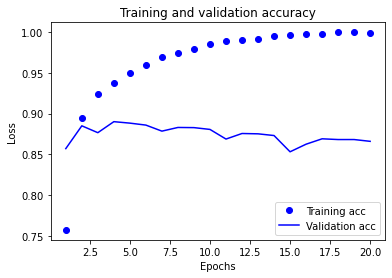

In [23]:
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
###### New model

In [42]:
new_model = models.Sequential()
new_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
new_model.add(layers.Dense(16, activation='relu'))
new_model.add(layers.Dense(1, activation='sigmoid'))

new_model.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['accuracy'])

new_model.fit(x_train, y_train, epochs=4, batch_size=512)
results = new_model.evaluate(x_test, y_test)
results

Epoch 1/4
49/49 [==============================] - 1s 5ms/step - loss: 0.4327 - accuracy: 0.8238
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2498 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.1936 - accuracy: 0.9312
Epoch 4/4
782/782 [==============================] - 1s 747us/step - loss: 0.3002 - accuracy: 0.8815


[0.3002445697784424, 0.8815199732780457]

In [29]:
new_model.predict(x_test)

array([[0.18519124],
       [0.9994199 ],
       [0.89940035],
       ...,
       [0.15367249],
       [0.07230392],
       [0.7026137 ]], dtype=float32)